In [20]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt


In [21]:
# parameters
OMAG_PATH = "/Users/peilinli/Documents/fydp.nosync/optics-project/training-data/2015-09-07-Images-46/OMAG Bscans/"
OMAG_IMAGE_PATH = OMAG_PATH + "64.png"
CONTRAST_FACTOR = 1.5
SHARPNESS_FACTOR = 2.0


In [22]:
original_image = Image.open(OMAG_IMAGE_PATH)


In [23]:
contrast_enhancer = ImageEnhance.Contrast(original_image)
contrast_image = contrast_enhancer.enhance(CONTRAST_FACTOR)


In [24]:
sharpness_enhancer = ImageEnhance.Sharpness(original_image)
sharpened_image = sharpness_enhancer.enhance(SHARPNESS_FACTOR)



In [25]:
both_enhancer = ImageEnhance.Sharpness(contrast_image)
both_image = sharpness_enhancer.enhance(SHARPNESS_FACTOR)


<Figure size 432x288 with 0 Axes>

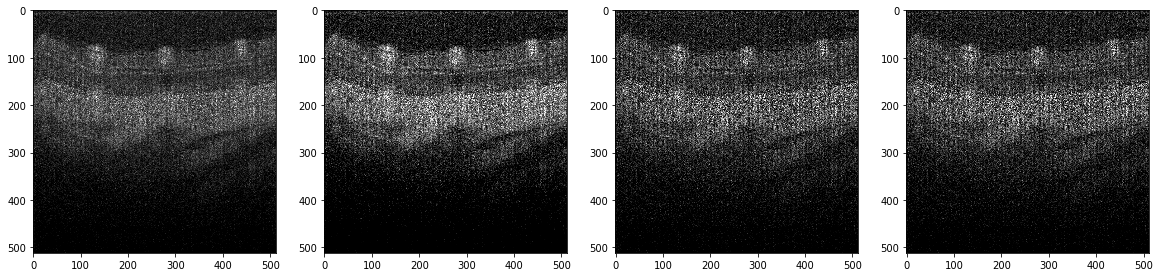

In [26]:
%matplotlib inline
plt.gray()

fig1, ax = plt.subplots(1, 4)
fig1.set_size_inches(20.0, 10.0)
ax[0].imshow(original_image)
ax[1].imshow(contrast_image)
ax[2].imshow(sharpened_image)
ax[3].imshow(both_image)
plt.show()


In [27]:
from enface.slicer import Slicer
from enface.loader import Loader


In [28]:
LOW_BOUND_LAYER = 60
HIGH_BOUND_LAYER = 240
IMAGE_DIMENSIONS = original_image.size
input_type = Loader.InputType.OMAG
loader = Loader(src_dir=OMAG_PATH, input_type=input_type, image_dimensions=IMAGE_DIMENSIONS)


In [29]:
original_eye = loader.load_data_set(contrast_factor=1.0, sharpness_factor=1.0)
original_slice = Slicer(original_eye, IMAGE_DIMENSIONS).multi_slice_sum(original_eye, LOW_BOUND_LAYER, HIGH_BOUND_LAYER)


TypeError: load_data_set() got an unexpected keyword argument 'contrast_factor'

Loading 319 images from `/Users/peilinli/Documents/fydp.nosync/optics-project/training-data/2015-09-07-Images-46/OMAG Bscans/` ...
<class 'NoneType'>


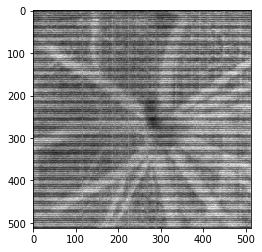

In [37]:
contrast_eye = loader.load_data_set(contrast_factor=CONTRAST_FACTOR, sharpness_factor=1.0)
contrast_slice = Slicer(contrast_eye, IMAGE_DIMENSIONS).multi_slice_sum(contrast_eye, LOW_BOUND_LAYER, HIGH_BOUND_LAYER)


In [ ]:
sharpness_eye = loader.load_data_set(contrast_factor=1.0, sharpness_factor=SHARPNESS_FACTOR)
sharpness_slice = Slicer(sharpness_eye, IMAGE_DIMENSIONS).multi_slice_sum(sharpness_eye, LOW_BOUND_LAYER, HIGH_BOUND_LAYER)


In [ ]:
both_eye = loader.load_data_set(contrast_factor=1.0, sharpness_factor=SHARPNESS_FACTOR)
both_slice = Slicer(both_eye, IMAGE_DIMENSIONS).multi_slice_sum(both_eye, LOW_BOUND_LAYER, HIGH_BOUND_LAYER)



In [ ]:
fig2, ax = plt.subplots(1, 4)
fig2.set_size_inches(20.0, 10.0)
ax[0].imshow(original_slice)
ax[1].imshow(contrast_slice)
ax[2].imshow(sharpness_slice)
ax[3].imshow(both_slice)
plt.show()
